# **Project Name** - Predicting Machine Failure in TATA Steel Plant

##### **Project Type**    - ML Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Thirumalai Vaasan Raghunathan

# **Project Summary -**

In the manufacturing sector, the efficiency and reliability of machinery plays a key role in achieving optimal production quality and minimizing downtime. TATA Steel, a leader in the steel manufacturing industry is constantly looking for ways to improve it's production process through advanced data analytics and machine learning techniques. Predicting and preventing machine failure is crucial for minimizing production losses, reducing maintenance cost and ensuring production quality.

The dataset provided here represent various operational parameters and failure types of machinery used in steel production. The data is synthetically generated based on real-world scenarios, allowing us to explore different machine learning teachniques to predict potential failures. Through the data analysis, TATA Steel aims to develop predictive models that can anticipate machine faliures before they occur, thus enabling proactive maintenance and improved operational efficiency.

# **GitHub Link -**

https://github.com/malaVasa98

# **Problem Statement**


**The aim of project is to use a ML Classification model to predict machine failure based on the required set of parameters provided in the dataset.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
steel_fl = pd.read_csv('train_data.csv')

### Dataset First View

In [4]:
# Dataset First Look
steel_fl.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
steel_fl.shape

(136429, 14)

### Dataset Information

In [6]:
# Dataset Info
steel_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
steel_fl.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
steel_fl.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
# Visualizing the missing values
# As there are no null values in each column, no need to visualise them.

### What did you know about your dataset?

There are 136429 examples and 14 features in the dataset. Two features are of object datatype - Product ID, Type. Product ID is a unique identifier but Type is of categorical type. Rest of the features are numerical. Air Temperature, Process Temperature, Rotational speed, Torque and Tool wear must be logically numerical. On the other hand, Machine Failure, TWF, HDF, PWF, OSF and RNF are actually categorical but treated as numerical due to presence of 0 and 1. This will be explained in detail later.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
steel_fl.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [10]:
# Dataset Describe
steel_fl[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901
std,1.862247,1.385173,138.736632,8.502229,63.965040
min,295.300000,305.800000,1181.000000,3.800000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000


In [11]:
steel_fl[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].skew(axis=0)

Air temperature [K]        0.161175
Process temperature [K]    0.057088
Rotational speed [rpm]     1.888250
Torque [Nm]               -0.028963
Tool wear [min]           -0.027310
dtype: float64

### Variables Description

**Type** - Quality of product classified into Low, Medium and High.

**Air temperature [K]** - Air temperature simulated by a random process and adjusted to have a certain variability around a standard value.

**Process temperature [K]** - Represents the temperature within the process, generated with a slight increase over the air temperature and adjusted to a specific variability.

**Rotational speed [rpm]** - Speed at which the machine operates, calculated based on a fixed power level with added random variation.

**Torque [Nm]** - Measures the force applied by the machine, distributed around a certain average value with specific variation, ensuring only positive values.

**Tool wear [min]** - Indicates wear on the tool, with the duration increasing based on the quality category of the product.

**Machine failure** - Indicates whether the machine has experienced failure, with several types of failures described.

**TWF (Tool Wear failure)** - Occurs when the tool is replaced or fails after a certain amount of usage time, which is randomly determined within a specific range.

**HDF (Heat Dissipation failure)** - Happens if the temperature difference between the air and the process is too small and the machine speed is below a certain threshold.

**PWF (Power failure)** - Occurs if the power, calculated from torque and speed falls out a defined acceptable range.

**OSF (Overstrain failure)** - Occurs if the combined effect of tool wear and torque exceeds specific limits based on the product quality.

**RNF (Random failure)** - A small probability of failure occuring randomly.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for x in steel_fl.columns:
    print(f"{x} - {steel_fl[x].nunique()}")

id - 136429
Product ID - 9976
Type - 3
Air temperature [K] - 95
Process temperature [K] - 81
Rotational speed [rpm] - 952
Torque [Nm] - 611
Tool wear [min] - 246
Machine failure - 2
TWF - 2
HDF - 2
PWF - 2
OSF - 2
RNF - 2


In [13]:
for x in steel_fl.columns:
    print(f"*******{x}*******")
    print(steel_fl[x].unique())

*******id*******
[     0      1      2 ... 136426 136427 136428]
*******Product ID*******
['L50096' 'M20343' 'L49454' ... 'M18739' 'L50940' 'L48036']
*******Type*******
['L' 'M' 'H']
*******Air temperature [K]*******
[300.6   302.6   299.3   301.    298.    298.4   299.6   298.7   297.7
 300.5   301.5   301.4   297.1   298.5   297.6   300.4   303.5   298.6
 300.9   297.2   298.3   297.4   301.3   300.2   300.1   297.8   300.7
 300.8   299.2   299.7   302.5   301.8   296.7   302.4   298.1   301.9
 299.1   299.    299.8   298.9   297.3   297.9   298.8   300.    302.3
 297.5   303.9   301.7   303.7   301.2   303.3   303.6   300.3   302.1
 299.5   299.4   302.2   297.    298.2   304.    303.1   296.9   301.1
 295.5   302.    304.2   303.4   296.1   302.9   301.6   304.1   303.
 295.6   302.7   296.8   296.2   303.8   299.9   295.7   303.2   296.3
 295.9   295.8   302.8   296.6   296.5   296.4   304.3   296.    295.4
 304.4   295.3   300.98  297.095 303.96 ]
*******Process temperature [K]**

In [14]:
# Value counts for categorical (inluding failure) variables
var = ['Type','Machine failure','TWF','HDF','PWF','OSF','RNF']
for x in var:
    print(steel_fl[x].value_counts())

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64
Machine failure
0    134281
1      2148
Name: count, dtype: int64
TWF
0    136217
1       212
Name: count, dtype: int64
HDF
0    135725
1       704
Name: count, dtype: int64
PWF
0    136102
1       327
Name: count, dtype: int64
OSF
0    135889
1       540
Name: count, dtype: int64
RNF
0    136121
1       308
Name: count, dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
steel_fl.drop(['id','Product ID'],axis=1,inplace=True)

In [16]:
steel_fl

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


### What all manipulations have you done and insights you found?

As there are no null values and duplicate values present in the dataset, there isn't any need for imputation and dropping duplicates. The columns id and Product ID have been dropped as they as identifiers and don't contribute much in giving insights.

Regarding the numerical features (excluding features corresponding to failure), we can see that Air temperature, Process temperature, Torque and Tool wear are approximately symmetric but Rotational speed is moderately positively skewed. This may mean that Rotational speed would have outliers whereas other features won't as the skew value lies between -0.5 and 0.5.

It is observed that most of the products in the dataset are of type Low (L) and High (H) is the least. Regarding the Failure categories, the count of 0 is much higher than 1, which means that there are high chances that the model would predict 0 more than 1. Resampling of the dataset may have to be done before training the model. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

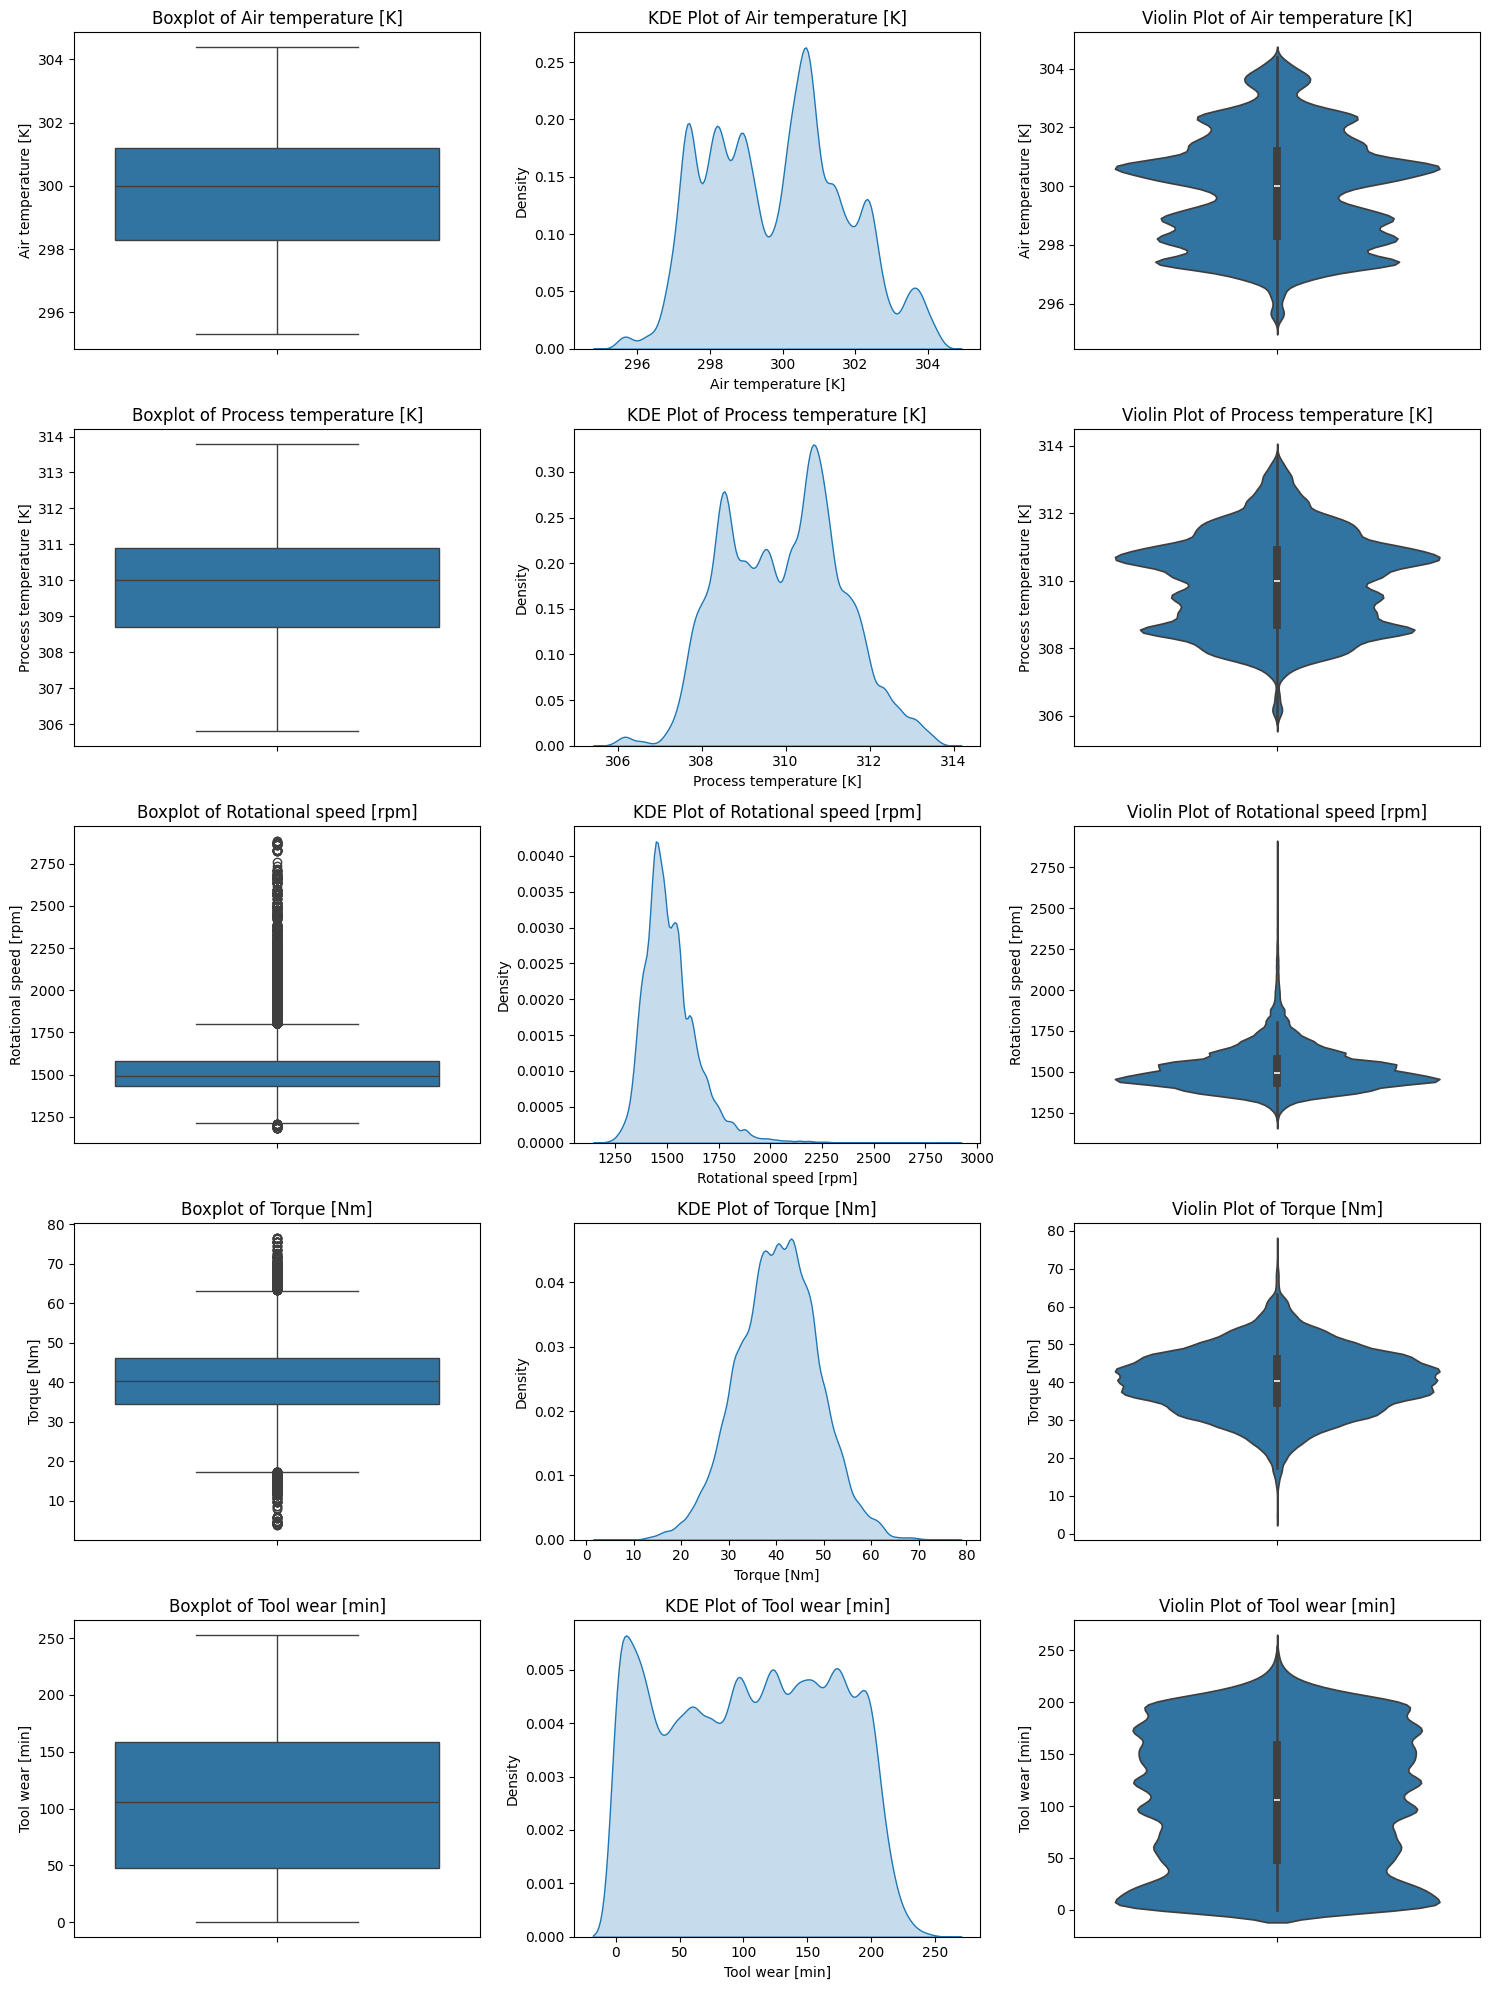

In [18]:
# Chart - 1 visualization code
steel_numfl = steel_fl[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
# Loop through each column and plot boxplot, kdeplot, and violinplot
for i, col in enumerate(steel_numfl.columns):
    sns.boxplot(y=steel_numfl[col], ax=axes[i, 0])
    sns.kdeplot(steel_numfl[col], ax=axes[i, 1], fill=True)
    sns.violinplot(y=steel_numfl[col], ax=axes[i, 2])

    # Set titles for the plots
    axes[i, 0].set_title(f'Boxplot of {col}')
    axes[i, 1].set_title(f'KDE Plot of {col}')
    axes[i, 2].set_title(f'Violin Plot of {col}')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot is useful in visualising the outliers present in the dataset as it considers the quartlies of the numerical distribution. The values lying outside the inter-quartile range are called as outliers. Outliers are denoted as black circles or dots in the boxplot diagram. KDE plot is useful in visualising the skewness present in the dataset. Violin plot which combines both boxplot and KDE plot, summarizes the information present in both.  

##### 2. What is/are the insight(s) found from the chart?

It is observed that Air temperature, Process temperature and Tool wear have no outliers. This is because min and max values don't deviate much from the first three quartiles. On the other hand Rotational speed have more outliers beacuse it is positively skewed and more outliers lie in the right hand side. Also Torque has outliers too eventhough the skew value is less. From the KDE plot for Torque, it can be seen that the tail extends in both sides thereby leading to the presence of outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As outliers are present only in rotational speed and torque, it seems that adjusting these values such that they lie within the inter-quartile range could prevent machine failure to some extent thereby improving the business but the above information is insufficient to prove this. More visual insights are needed to check is this is true or not.

#### Chart - 2

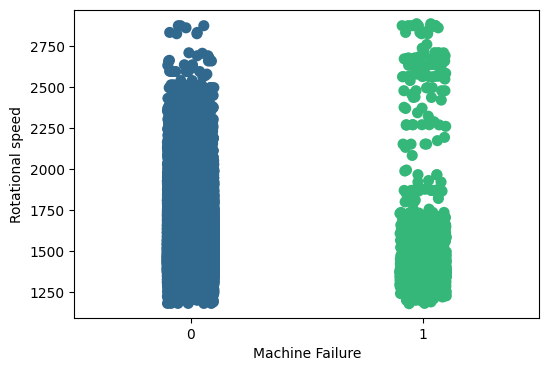

In [69]:
# Chart - 2 visualization code
# Rotational speed vs Machine Failure
# Create strip plot
plt.figure(figsize=(6, 4))
sns.stripplot(x='Machine failure', y='Rotational speed [rpm]', data=steel_fl, jitter=True, size=8, palette="viridis")

# Labels and title
plt.xlabel("Machine Failure")
plt.ylabel("Rotational speed")

plt.show()

##### 1. Why did you pick the specific chart?

Strip plot is useful in comparing numerical and categorical features. Here Machine Failure is treated as a categorical feature even though it's a numerical feature. To check the impact of rotational speed on Machine Failure.

##### 2. What is/are the insight(s) found from the chart?

It is observed from the chart that for rotational speeds, lying within 1750 and 2500, contribute to failure less as the values are densly packed at 0 and points are scattered at 1. For values less than 1750 and 2500, the failure values are densely packed meaning that chances of failure are quite high. But this needs to be confirmed with the hypothesis test.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the scatter plot, we can see that if the rotational speed doesn't lie in the range of 1750 and 2500, it may increase the chances of failure, thereby hindering the growth. This is verified with the bar plot shown below.

Failure rate in each speed range:
Speed_Range
<1750         1.562816
1750-2500     0.824931
>2500        64.285714
Name: Machine failure, dtype: float64


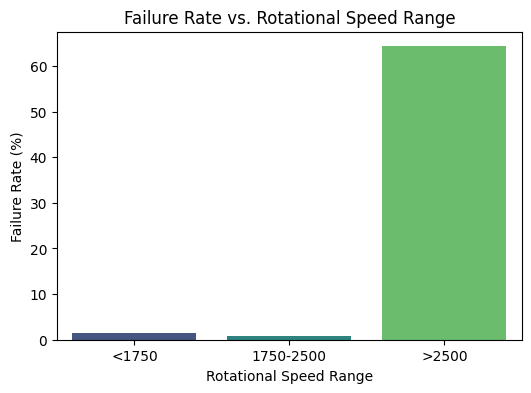

In [75]:
# Let's confirm the above hypothesis with a bar plot by splitting them into bins [0-1750] [1750-2500] [2500-max]
bins = [0,1750,2500,steel_fl['Rotational speed [rpm]'].max()]
labels = ['<1750', '1750-2500', '>2500']
steel_fl['Speed_Range'] = pd.cut(steel_fl['Rotational speed [rpm]'], bins=bins, labels=labels, right=False)
# Calculate failure rate per speed range
failure_rate = steel_fl.groupby('Speed_Range')['Machine failure'].mean() * 100

# Print results
print("Failure rate in each speed range:")
print(failure_rate)

# Plot failure rates
plt.figure(figsize=(6,4))
sns.barplot(x=failure_rate.index, y=failure_rate.values, palette='viridis')
plt.ylabel('Failure Rate (%)')
plt.xlabel('Rotational Speed Range')
plt.title('Failure Rate vs. Rotational Speed Range')
plt.show()

From the bar plot, it can be seen that failure rate is much least if the rotational speed is within 1750-2500 and much higher if it exceeds 2500. So, our hypothesis is true.

In [77]:
steel_fl.drop('Speed_Range',axis=1,inplace=True)

#### Chart - 3

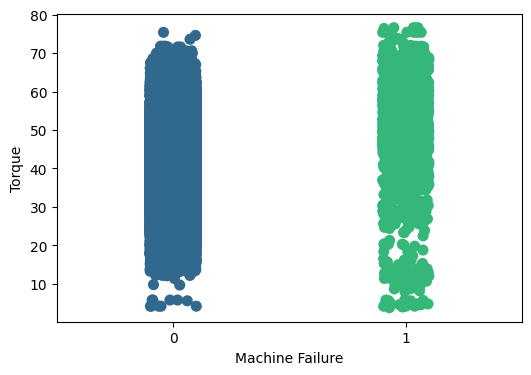

In [81]:
# Chart - 3 visualization code
# Torque vs Machine Failure
plt.figure(figsize=(6,4))
sns.stripplot(x='Machine failure', y='Torque [Nm]', data=steel_fl, jitter=True, size=8, palette="viridis")

# Labels and title
plt.xlabel("Machine Failure")
plt.ylabel("Torque")
plt.show()

##### 1. Why did you pick the specific chart?

To compare torque (numerical feature) with machine failure (categorical). 

##### 2. What is/are the insight(s) found from the chart?

Here, it is observed that for torque value below 10 the '0' (not failure) values are spread whereas '1' (failure) values are densly packed. This means that high chances of failure occur when torque is below 10. For values roughly between 15 and 25 the '1' values are less densely packed but the '0' values are more densely packed. This could mean that failure chances are quite less in this range. However, for torque above 25, nothing much can be said as the distributions are similar to each other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Torque doesn't provide a generalised information unlike Rotational Speed. So, other factors need to be checked.

#### Chart - 4

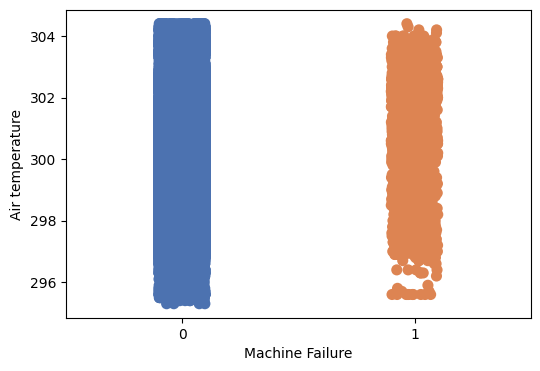

In [82]:
# Chart - 4 visualization code
# Air temperature vs Machine failure
plt.figure(figsize=(6,4))
sns.stripplot(x='Machine failure', y='Air temperature [K]', data=steel_fl, jitter=True, size=8, palette="deep")

# Labels and title
plt.xlabel("Machine Failure")
plt.ylabel("Air temperature")
plt.show()

##### 1. Why did you pick the specific chart?

To compare the effect of Air temperature on Machine Failure.

##### 2. What is/are the insight(s) found from the chart?

For values lying below 296.2 (approx)and above 304 the failure values are spread but non-failure values are densely packed. So, chances of failure are less. But for values lying between 296.2 and 304, both the failure and non-failure values are dense. So, the machine may or may not fail.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Some insights were obtained related to chances of failure, but a generalised view is not obtained unlike Rotational speed. So, the insights provide insufficient information for enabling a positive business impact.

#### Chart - 5

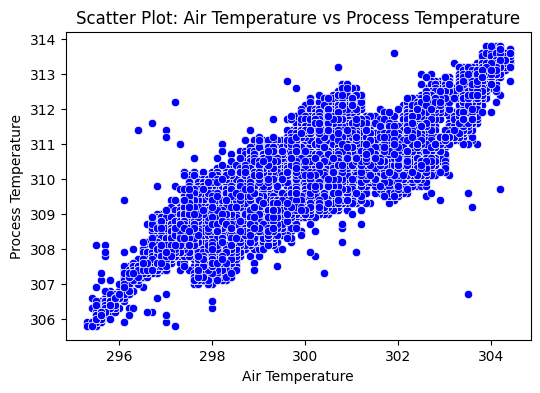

In [86]:
# Chart - 5 visualization code
# scatter plot of Air Temperature vs Process Temperature
# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=steel_fl, color='blue')

# Labels and Title
plt.xlabel('Air Temperature')
plt.ylabel('Process Temperature')
plt.title('Scatter Plot: Air Temperature vs Process Temperature')
plt.show()

##### 1. Why did you pick the specific chart?

To check the relationship between Air temperature and Process temperature. Scatter plot can be used to compare two numerical features.

##### 2. What is/are the insight(s) found from the chart?

An approximate linear relationship is observed between Air temperature and Process temperature. In other words, a positive correlation is observed between Air temperature and Process temperature. This means that the relationship between Process temperature and Machine Failure would be similar to that of Air temperature and Machine failure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are no insights with regards to the growth of the company. 

#### Chart - 6

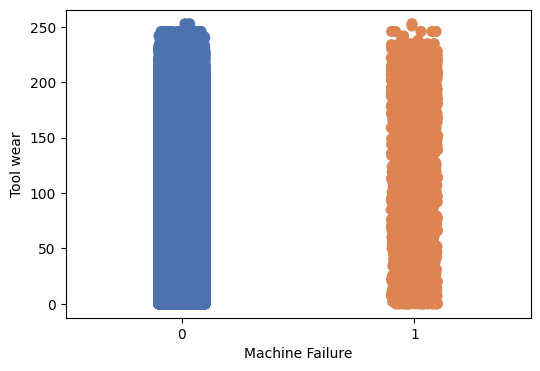

In [88]:
# Chart - 6 visualization code
# Tool wear vs Machine Failure
plt.figure(figsize=(6,4))
sns.stripplot(x='Machine failure', y='Tool wear [min]', data=steel_fl, jitter=True, size=8, palette="deep")

# Labels and title
plt.xlabel("Machine Failure")
plt.ylabel("Tool wear")
plt.show()

##### 1. Why did you pick the specific chart?

To see the effect of Tool Wear on Machine Failure.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the distribution for failure (1) and non-failure (0) are similar to each other, so Tool Wear doesn't provide much insights on which values guarentee Machine Failure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, because no proper insights could be obtained.

#### Chart - 7

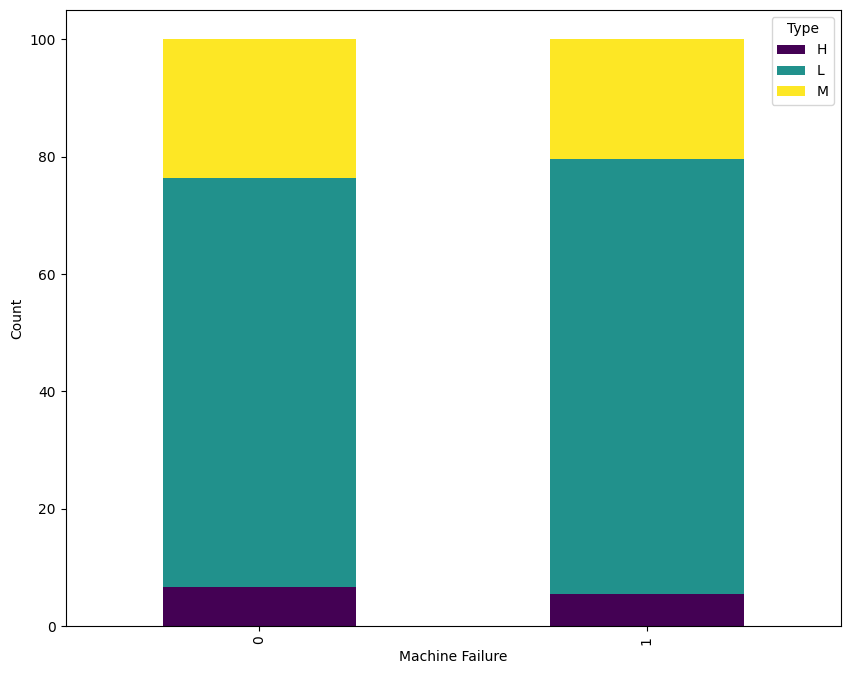

In [98]:
# Chart - 7 visualization code
# relative stacked bar plot for Type and Machine Failure.
steel_fl_gr = steel_fl.groupby(['Machine failure','Type'])['Machine failure'].count().unstack()

# Normalize to get relative proportions (convert to percentages)
steel_fl_percentage = steel_fl_gr.div(steel_fl_gr.sum(axis=1), axis=0) * 100

# Stacked Bar Plot
steel_fl_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,8))

# Labels and Title
plt.xlabel("Machine Failure")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of machine failure for different quality type.

##### 2. What is/are the insight(s) found from the chart?

The distribution of Low, Medium and High are almost identical for non-failure (0) and failure (1). The Low quality has highest proportion in both the cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, as particular insights weren't obtained with regards to Machine Failure.

#### Chart - 8

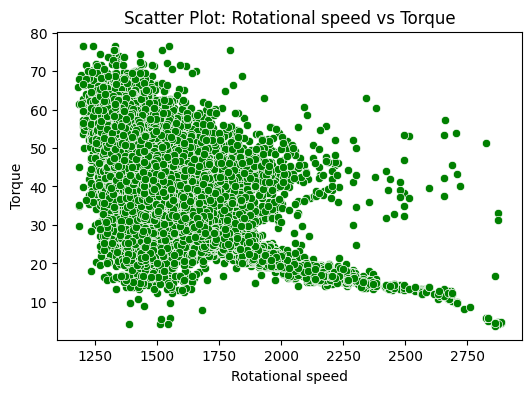

In [100]:
# Chart - 8 visualization code
# Rotational speed vs torque
# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=steel_fl, color='green')

# Labels and Title
plt.xlabel('Rotational speed')
plt.ylabel('Torque')
plt.title('Scatter Plot: Rotational speed vs Torque')
plt.show()

##### 1. Why did you pick the specific chart?

To compare Rotational Speed and Torque in order to have an idea which torque range won't contribute to machine failure.

##### 2. What is/are the insight(s) found from the chart?

The data points are dense for rotational speed lying in the range of 1250-2000. Majority of the torque values have rotational speeds between 1250 and 2000. Also, for rotational speeds between 1750 and 2750, the torque values are much concentrated in the range of 10-30.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. If the torque values lie in the range of 10-30 where the rotational speed lies in the range of 1750-2000, chances of machine failure is much less thereby improving performance and productivity.

#### Chart - 9

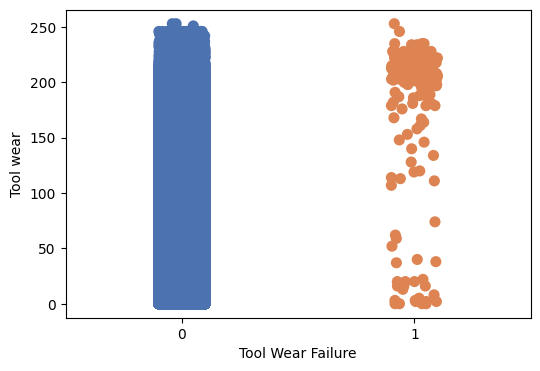

In [104]:
# Chart - 9 visualization code
# Compare TWF and Tool wear
plt.figure(figsize=(6,4))
sns.stripplot(x='TWF', y='Tool wear [min]', data=steel_fl, jitter=True, size=8, palette="deep")

# Labels and title
plt.xlabel("Tool Wear Failure")
plt.ylabel("Tool wear")
plt.show()

##### 1. Why did you pick the specific chart?

To compare tool wear and tool wear failure.

##### 2. What is/are the insight(s) found from the chart?

Though comparing tool wear and machine failure didn't give us much insights, comparing tool wear and tool wear failure gives us good insights. The chances of tool wear failure are high if the tool wear > 200. Let's prove by using bar plot given below.

Failure rate in each speed range:
Speed_Range
0-200    0.052078
>200     1.852567
Name: TWF, dtype: float64


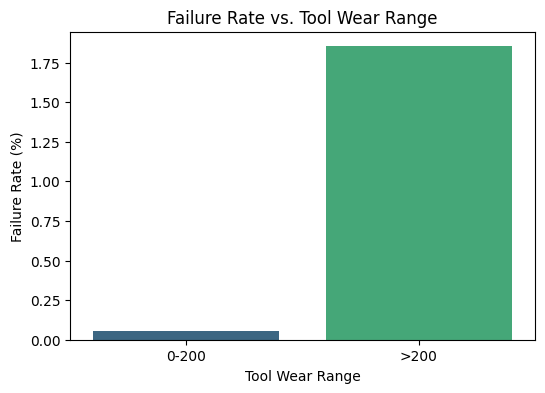

In [110]:
# Let's confirm the above hypothesis with a bar plot by splitting them into bins [0-200][200-]
bins = [0,200,steel_fl['Tool wear [min]'].max()]
labels = ['0-200', '>200']
steel_fl['Speed_Range'] = pd.cut(steel_fl['Tool wear [min]'], bins=bins, labels=labels, right=False)
# Calculate failure rate per speed range
failure_rate = steel_fl.groupby('Speed_Range')['TWF'].mean() * 100

# Print results
print("Failure rate in each speed range:")
print(failure_rate)

# Plot failure rates
plt.figure(figsize=(6,4))
sns.barplot(x=failure_rate.index, y=failure_rate.values, palette='viridis')
plt.ylabel('Failure Rate (%)')
plt.xlabel('Tool Wear Range')
plt.title('Failure Rate vs. Tool Wear Range')
plt.show()

In [111]:
steel_fl.drop('Speed_Range',axis=1,inplace=True)

The above diagram suggests that chances of tool wear failure are high when the tool wear > 200 thereby proving our hypothesis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as tool wear failure is a contributing factor to machine failure. Adjusting tool wear values to < 200 could prevent machine failure due to tool wear failure.

#### Chart - 10

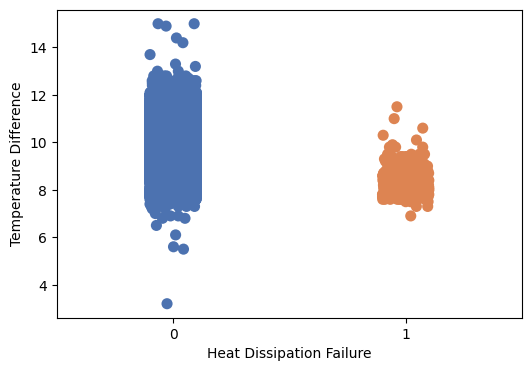

In [117]:
# Chart - 10 visualization code
# Head Dissipation failure vs Temperature difference
steel_fl['Temp_diff'] = abs(steel_fl['Air temperature [K]'] - steel_fl['Process temperature [K]'])
plt.figure(figsize=(6,4))
sns.stripplot(x='HDF', y='Temp_diff', data=steel_fl, jitter=True, size=8, palette="deep")

# Labels and title
plt.xlabel("Heat Dissipation Failure")
plt.ylabel("Temperature Difference")
plt.show()

In [118]:
steel_fl.drop('Temp_diff',axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

To compare the temperature difference between air temperature and process temperature and the heat dissipation failure.

##### 2. What is/are the insight(s) found from the chart?

The stripplot provides better insights than comparison between air temperature and process temperature. The values for no failure (0) are concentrated much between 7.9 and 12.2 (roughly). Whereas for failure (1), the values are concentrated between 7.9 and 10 (approximately). This means Heat dissipation failure mostly occurs if the temperature difference is between 7.9 and 10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, there are insights that lead to neagtive growth. If the temperature difference between Air and Process temperature is in the range of 7.9 - 10, the chances of machine failure due to heat dissipation failure is high.

#### Chart - 11

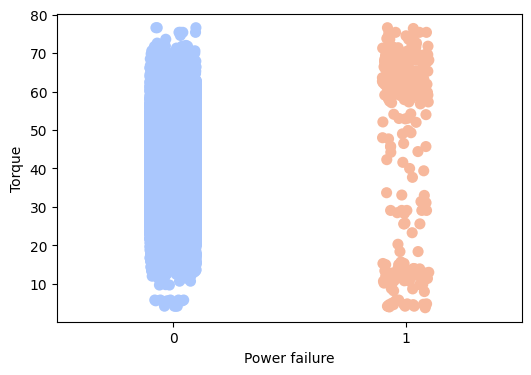

In [120]:
# Chart - 11 visualization code
# Power Failure and Torque
plt.figure(figsize=(6,4))
sns.stripplot(x='PWF', y='Torque [Nm]', data=steel_fl, jitter=True, size=8, palette="coolwarm")

# Labels and title
plt.xlabel("Power failure")
plt.ylabel("Torque")
plt.show()

##### 1. Why did you pick the specific chart?

As Power failure depends on Torque, so a stripplot is plotted between Power Failure and Torque. 

##### 2. What is/are the insight(s) found from the chart?

For torque values lying between 20 and 60, the chances of power failure is less as the values are very less and spread in the failure part (1). For torque > 60, the failure values are dense so chances of failure is high. Let's compute the failure rate and see.

Failure rate in each speed range:
Speed_Range
0-20      6.039755
20-60     0.056190
>60      10.481414
Name: PWF, dtype: float64


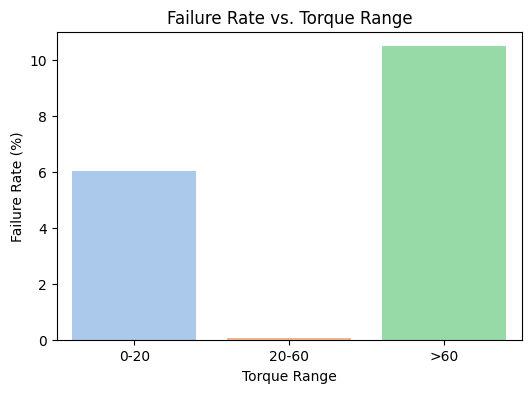

In [121]:
# Let's confirm the above hypothesis with a bar plot by splitting them into bins [0-20][20-60][60-]
bins = [0,20,60,steel_fl['Torque [Nm]'].max()]
labels = ['0-20','20-60','>60']
steel_fl['Speed_Range'] = pd.cut(steel_fl['Torque [Nm]'], bins=bins, labels=labels, right=False)
# Calculate failure rate per speed range
failure_rate = steel_fl.groupby('Speed_Range')['PWF'].mean() * 100

# Print results
print("Failure rate in each speed range:")
print(failure_rate)

# Plot failure rates
plt.figure(figsize=(6,4))
sns.barplot(x=failure_rate.index, y=failure_rate.values, palette='pastel')
plt.ylabel('Failure Rate (%)')
plt.xlabel('Torque Range')
plt.title('Failure Rate vs. Torque Range')
plt.show()

In [127]:
steel_fl.drop('Speed_Range',axis=1,inplace=True)

The failure rate is least in the range of 20-60. For Torque <20 and >60, failure rate is much higher, thereby proving the hypothesis. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, for torque values lying in the range of 20-60, the power failure is much lesser thereby preventing machine failure due to power failure and improving machine performance.

#### Chart - 12

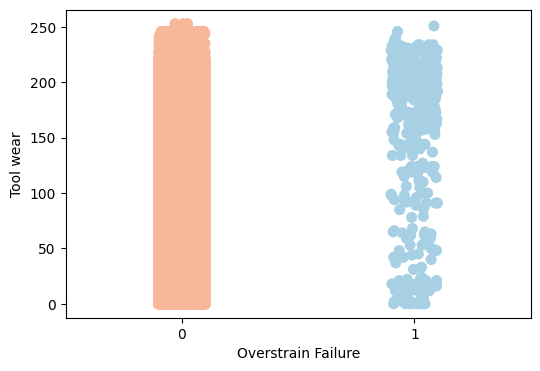

In [124]:
# Chart - 12 visualization code
# Overstrain failure vs Tool wear
plt.figure(figsize=(6,4))
sns.stripplot(x='OSF', y='Tool wear [min]', data=steel_fl, jitter=True, size=8, palette="RdBu")

# Labels and title
plt.xlabel("Overstrain Failure")
plt.ylabel("Tool wear")
plt.show()

##### 1. Why did you pick the specific chart?

Overstrain failure depends on Tool Wear as per the variable description. Used stripplot as overstrain failure contains two unique values.

##### 2. What is/are the insight(s) found from the chart?

For the tool wear values lying between 25 and 150, the chances of overstrain failure are quite less as the values are not dense in this range. For tool wear > 150 and < 25, the failure values are densely packed. Let's verify this. 

Failure rate in each speed range:
Speed_Range
0-25      0.220027
25-150    0.108537
>150      1.018894
Name: OSF, dtype: float64


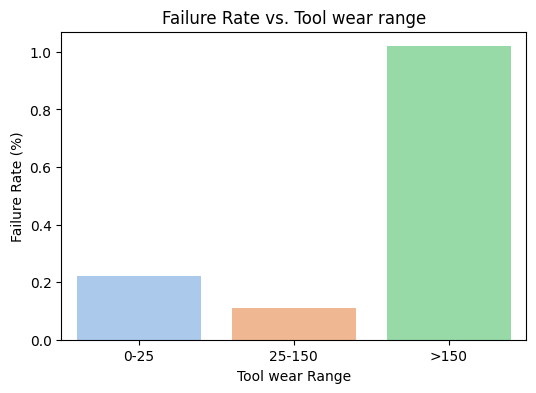

In [17]:
# Let's confirm the above hypothesis with a bar plot by splitting them into bins [0-25][25-150][150-]
bins = [0,25,150,steel_fl['Tool wear [min]'].max()]
labels = ['0-25','25-150','>150']
steel_fl['Speed_Range'] = pd.cut(steel_fl['Tool wear [min]'], bins=bins, labels=labels, right=False)
# Calculate failure rate per speed range
failure_rate = steel_fl.groupby('Speed_Range')['OSF'].mean() * 100

# Print results
print("Failure rate in each speed range:")
print(failure_rate)

# Plot failure rates
plt.figure(figsize=(6,4))
sns.barplot(x=failure_rate.index, y=failure_rate.values, palette='pastel')
plt.ylabel('Failure Rate (%)')
plt.xlabel('Tool wear Range')
plt.title('Failure Rate vs. Tool wear range')
plt.show()

In [18]:
del steel_fl['Speed_Range']

As mentioned, the failure is least in the range of 25-150 and much higher when tool wear > 150, thus proving the hypothesis to be true.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If Tool Wear lies in the range of 25-150, the failure rate is less i.e., the chances of overstrain failure is very less, thereby reducing the chances of machine failure.

#### Chart - 13

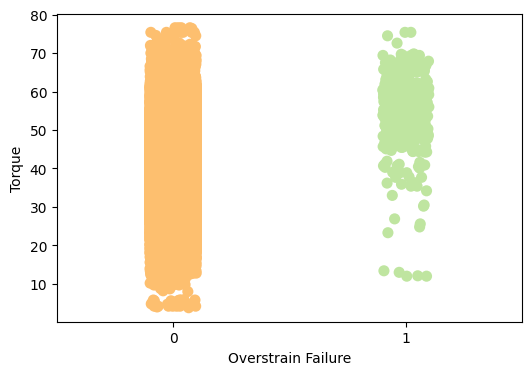

In [16]:
# Chart - 13 visualization code
# Overstrain failure vs Torque
plt.figure(figsize=(6,4))
sns.stripplot(x='OSF', y='Torque [Nm]', data=steel_fl, jitter=True, size=8, palette="Spectral")

# Labels and title
plt.xlabel("Overstrain Failure")
plt.ylabel("Torque")
plt.show()

##### 1. Why did you pick the specific chart?

A overstrain failure (OSF) depends on torque too, so I have plotted a stripplot betweem overstrain failure and torque.

##### 2. What is/are the insight(s) found from the chart?

For torque values less than 45 (approximately), chances of overstrain failure are quite less as the failure (1) values are less dense. The values are densely packed for non-failure (0) values. Let's verify this.

Failure rate in each speed range:
Speed_Range
0-45    0.046800
>45     1.229142
Name: OSF, dtype: float64


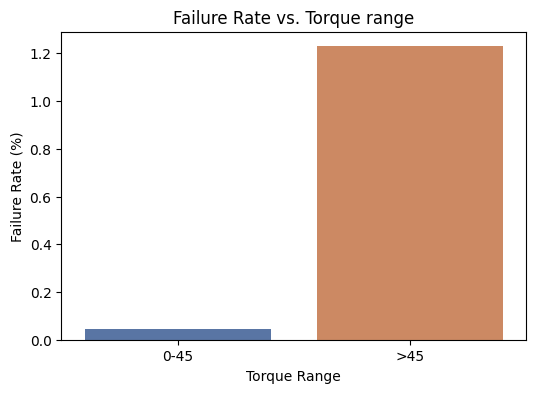

In [18]:
# Let's confirm the above hypothesis with a bar plot by splitting them into bins [0-45][45-]
bins = [0,45,steel_fl['Torque [Nm]'].max()]
labels = ['0-45','>45']
steel_fl['Speed_Range'] = pd.cut(steel_fl['Torque [Nm]'], bins=bins, labels=labels, right=False)
# Calculate failure rate per speed range
failure_rate = steel_fl.groupby('Speed_Range')['OSF'].mean() * 100

# Print results
print("Failure rate in each speed range:")
print(failure_rate)

# Plot failure rates
plt.figure(figsize=(6,4))
sns.barplot(x=failure_rate.index, y=failure_rate.values, palette='deep')
plt.ylabel('Failure Rate (%)')
plt.xlabel('Torque Range')
plt.title('Failure Rate vs. Torque range')
plt.show()

In [19]:
del steel_fl['Speed_Range']

From the above bar plot, it can be seen that for torque < 45, the failer rate is very less and for torque >45, the failure rate is higher thereby proving the hypothesis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Setting the torque above 45 induces overstrain failure and this leads to machine failure which is a negative growth.

#### Chart - 14 - Correlation Heatmap

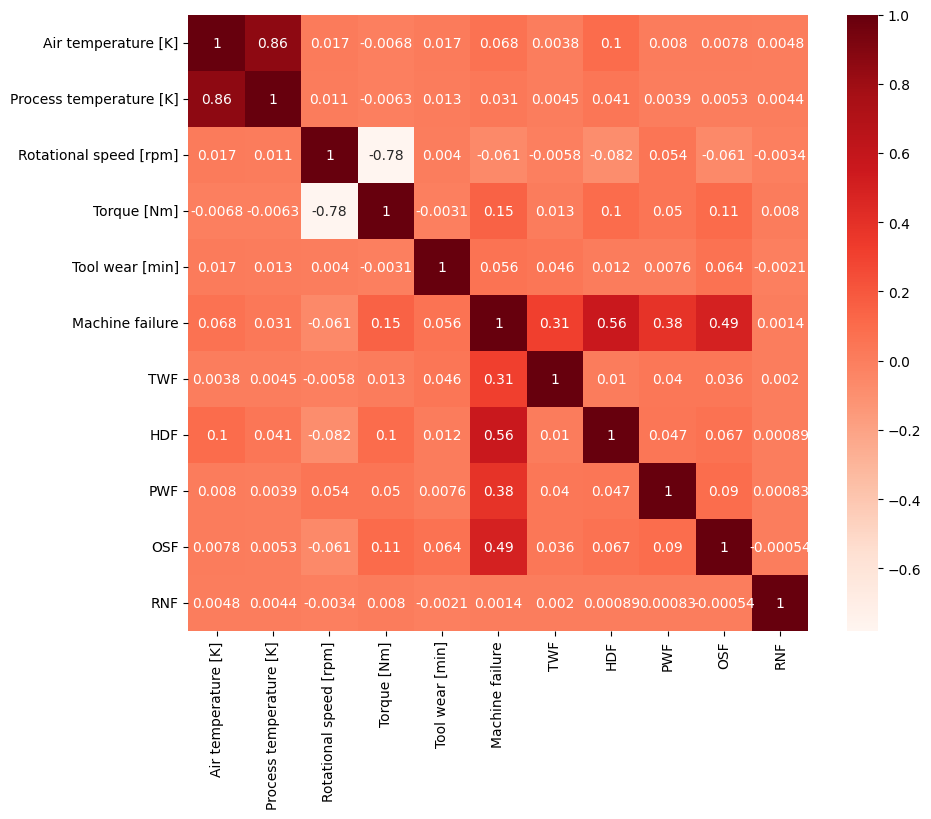

In [20]:
# Correlation Heatmap visualization code
steel_numfl = steel_fl.drop('Type',axis=1)
corr_mat = steel_numfl.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='Reds')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation matrix is used to compare the correlation between numerical features present in the dataset. Heatmap is a great way to visualise the correlation matrix.

##### 2. What is/are the insight(s) found from the chart?

The matrix suggests that machine failure is strongly correlated with PWF, TWF, HDF, OSF. On the other hand, there is no strong association between machine failure and RF (random failure). This means that RF needn't be considered for training the model to predict machine failure. Air temperature and Process temperature have a strong positive correlation. On the other hand rotational speed and torque have a strong negative correlation.

#### Chart - 15 - Pair Plot

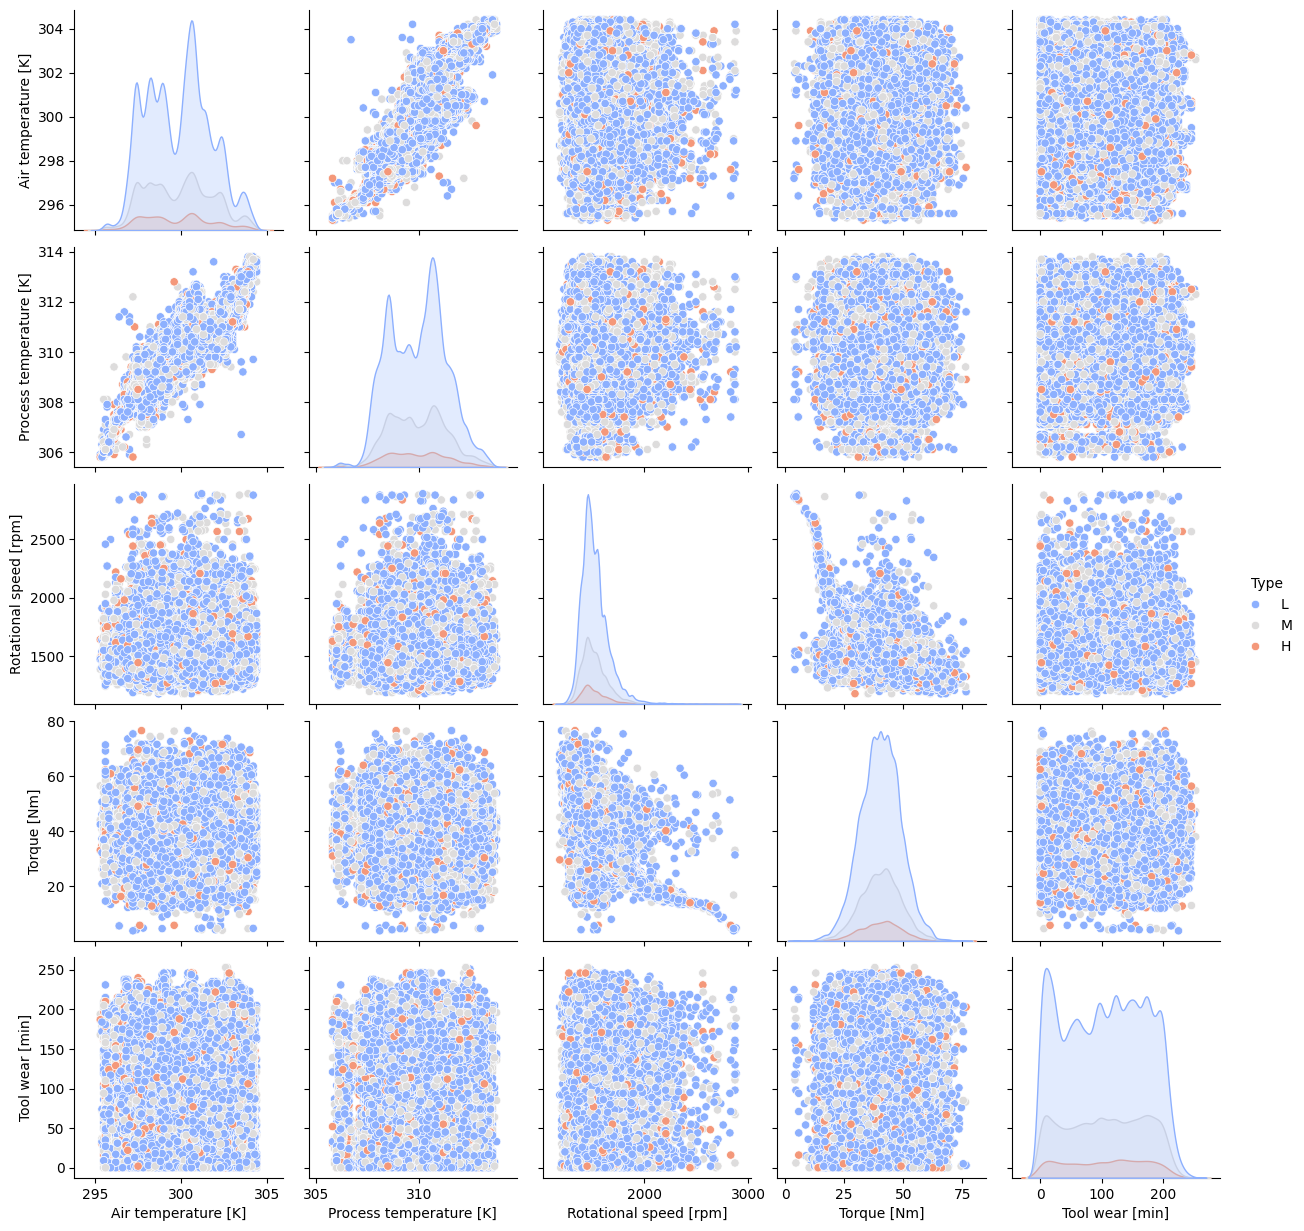

In [22]:
# Pair plot 
# Create a Pair Plot between numerical features.
steel_numfl = steel_fl[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Type']]
sns.pairplot(steel_numfl, hue="Type", palette="coolwarm")
plt.show()

##### 1. Why did you pick the specific chart?

To compare the numerical features based on Type, pairplot is useful.

##### 2. What is/are the insight(s) found from the chart?

Majority of the products are of type low (L) and high (H) is and not much insights can be found because the points are more clustered for two different numerical features. So, can't say anything specific about the relationship between features based on type. 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Rotational Speeds lying within 1750-2500 rpm reduces the chances of machine failure.
2. Torque lying between 20 and 60 reduces the chances of power failure.
3. Tool wear lying between 25 and 150 reduces the chances of overstrain failure.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The proportion of failures is the same for rotational speeds inside and outside the range (1750–2500 RPM).

Alternative Hypothesis (H₁): The proportion of failures is significantly lower when rotational speed is within 1750–2500 RPM.


#### 2. Perform an appropriate statistical test.

In [24]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

steel_fl['speed_category'] = steel_fl['Rotational speed [rpm]'].apply(lambda x: 'Within' if 1750 <= x <= 2500 else 'Outside')

# Create a contingency table
contingency_table = pd.crosstab(steel_fl['speed_category'], steel_fl['Machine failure'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)


Chi-Square Statistic: 28.816695673614618
P-value: 7.956229712393719e-08


In [25]:
steel_fl.drop('speed_category',axis=1,inplace=True)

As p-value < 0.05, reject Null hypothesis and accept alternate hypothesis.

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test.

##### Why did you choose the specific statistical test?

As the comparison is made between proportions (failure rates between two groups).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The proportion of power failures is the same for torque inside and outside the range 20-60.

Alternative Hypothesis (H₁): The proportion of power failures is significantly lower when torque is within 20-60.


#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

steel_fl['torque_category'] = steel_fl['Torque [Nm]'].apply(lambda x: 'Within' if 20 <= x <= 60 else 'Outside')

# Create a contingency table
contingency_table = pd.crosstab(steel_fl['torque_category'], steel_fl['PWF'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 8746.26108126089
P-value: 0.0


In [29]:
del steel_fl['torque_category']

A p-value < 0.05, reject Null hypothesis and accept alternate hypothesis.

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test.

##### Why did you choose the specific statistical test?

As the comparison is made between proportions (failure rates between two groups).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The proportion of overstrain failures is the same for tool wear inside and outside the range (25-150)

Alternative Hypothesis (H₁): The proportion of overstrain failures is significantly lower when tool wear is within 25-150.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

steel_fl['tool_wear_category'] = steel_fl['Tool wear [min]'].apply(lambda x: 'Within' if 25 <= x <= 150 else 'Outside')

# Create a contingency table
contingency_table = pd.crosstab(steel_fl['tool_wear_category'], steel_fl['OSF'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 354.35091646229284
P-value: 4.782801602001016e-79


In [32]:
del steel_fl['tool_wear_category']

A p-value < 0.05, reject Null hypothesis and accept alternate hypothesis.

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test.

##### Why did you choose the specific statistical test?

As the comparison is made between proportions (failure rates between two groups).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [17]:
# Handling Missing Values & Missing Value Imputation
steel_fl.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As there are no null values present in the dataset, this step is skipped.

### 2. Handling Outliers

From the boxplot, it is observed that Rotational Speed and Torque only have outliers. But is observed that for rotational speeds lying in the range of 1750-2500 (which are outliers) reduces chances of machine failure. So, removing them would affect predictions. In case of torque, values lying in 20-45 reduces machine failure but outlier values have more failure information so remove them would affect failure predictions by the model. So the outliers are retained. 

In [45]:
# Handling Outliers & Outlier treatments
# This is skipped

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outliers are retained here as removing them would affect the predictions made by the model.

### 3. Categorical Encoding

In [18]:
# Encode your categorical columns
# before doing this, let's check whether Type feature is required for model training.
# Perform ANOVA (only compare machine failure with type)
from scipy.stats import f_oneway
steel_categ = steel_fl[['Type']]
steel_num = steel_fl.drop('Type',axis=1)
for cat_var in steel_categ.columns:
    for num_var in steel_num.columns:
        # Group numerical data by the categorical variable
        groups = [group[num_var].values for _, group in steel_fl.groupby(cat_var)]
        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*groups)
        
        print(f"ANOVA for {num_var} grouped by {cat_var}:")
        print(f"  F-Statistic: {f_stat}")
        print(f"  P-Value: {p_value}")
        print("  Significant?" + (" Yes" if p_value < 0.05 else " No"))
        print("*"*40)

ANOVA for Air temperature [K] grouped by Type:
  F-Statistic: 12.801295985023492
  P-Value: 2.760510455067987e-06
  Significant? Yes
****************************************
ANOVA for Process temperature [K] grouped by Type:
  F-Statistic: 2.397975370242115
  P-Value: 0.09090564108094651
  Significant? No
****************************************
ANOVA for Rotational speed [rpm] grouped by Type:
  F-Statistic: 0.5726432601386057
  P-Value: 0.5640339374004131
  Significant? No
****************************************
ANOVA for Torque [Nm] grouped by Type:
  F-Statistic: 0.530304557700735
  P-Value: 0.588426945696245
  Significant? No
****************************************
ANOVA for Tool wear [min] grouped by Type:
  F-Statistic: 3.3949164578041544
  P-Value: 0.03354619015995314
  Significant? Yes
****************************************
ANOVA for Machine failure grouped by Type:
  F-Statistic: 9.94824599285738
  P-Value: 4.7846115093410004e-05
  Significant? Yes
***********************

This means that Type is considered for model training.

In [19]:
from sklearn.preprocessing import OrdinalEncoder
categy = list(steel_fl.Type.unique())
od_enc = OrdinalEncoder(categories=[categy])
steel_fl.Type = od_enc.fit_transform(steel_fl[['Type']])

#### What all categorical encoding techniques have you used & why did you use those techniques?

There is one categorical feature which is Type and I have used Ordinal Encoding to encode this because there is a natural ordering (L (Low), M (Medium), and H (High)). 

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

As air temperature and process temperature are highly positively correlated and rotational speed and torque are highly negatively correlated, we may retain both or remove either through feature importance done during training.

#### 2. Feature Selection

In [21]:
# Select your features wisely to avoid overfitting
steel_ml_fl = steel_fl.drop('RNF',axis=1)

##### What all feature selection methods have you used  and why?

Correlation matrix is used to compare numerical features and ANOVA is used is to compare numerical feature with the category 'Type'. 

##### Which all features you found important and why?

All except RNF are considered because RNF is weakly correlated to all the numerical features and in the ANOVA test, it is found that there is no significant relationship between RNF and Type. This suggests that RNF wouldn't contribute much in predicting machine failure.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [52]:
# Transform Your data
# No, let's proceed to data scaling

### 6. Data Scaling

In [23]:
# Scaling your data
from sklearn.preprocessing import StandardScaler, RobustScaler
ord_scale = StandardScaler()
out_scale = RobustScaler()

In [24]:
steel_ml_ord = steel_ml_fl.drop(['Rotational speed [rpm]','Torque [Nm]','Machine failure'],axis=1)
steel_ml_out = steel_ml_fl[['Rotational speed [rpm]','Torque [Nm]']]

In [25]:
steel_ml_ord_sc = ord_scale.fit_transform(steel_ml_ord.values)
steel_ml_out_sc = out_scale.fit_transform(steel_ml_out.values)

In [26]:
steel_ml_ord_scaled = pd.DataFrame(steel_ml_ord_sc,columns=steel_ml_ord.columns)
steel_ml_out_scaled = pd.DataFrame(steel_ml_out_sc,columns=steel_ml_out.columns)

In [27]:
steel_ml_sc = pd.concat([steel_ml_ord_scaled,steel_ml_out_scaled],axis=1)

##### Which method have you used to scale you data and why?

I have used Robust Scaler to scale Rotational Speed and Torque as they have outliers but Standard Scaler for the rest of the numerical features as they have no outliers.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No.

In [54]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

N/A

### 8. Data Splitting

In [28]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X = steel_ml_sc
Y = steel_ml_fl['Machine failure']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

80% of Train set and 20% of Test set because more parts of data are required to learn and make patterns. 20% of Test is used to check the performance of the model in making predictions. 

### 9. Handling Imbalanced Dataset

In [29]:
Y_train.value_counts()

Machine failure
0    107433
1      1710
Name: count, dtype: int64

In [30]:
Y_test.value_counts()

Machine failure
0    26848
1      438
Name: count, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

The non-failure (0) values dominate the dataset. This means that the model will be biased towards '0' and failure '1' values won't be learnt well by the model.

In [31]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_tr_up, Y_tr_up = smote.fit_resample(X_train, Y_train)

In [32]:
Y_tr_up.value_counts()

Machine failure
0    107433
1    107433
Name: count, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Used SMOTE to deal with oversampling of the dataset by creating synthetic samples of the minority class and balances the dataset. It reduces model bias and improves recall and F1-score.

## ***7. ML Model Implementation***

### ML Model - 1

In [93]:
# ML Model - 1 Implementation
# Decision Trees Classifier
from sklearn.tree import DecisionTreeClassifier
dt_c = DecisionTreeClassifier()
# Fit the Algorithm
dt_c.fit(X_tr_up,Y_tr_up)
# Predict on the model
Y_tr_uppred = dt_c.predict(X_tr_up)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import precision_score, recall_score
pr = precision_score(Y_tr_up,Y_tr_uppred)
rec = recall_score(Y_tr_up,Y_tr_uppred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.9999720727597698
Recall: 0.9998696862230413


In [95]:
# Let's see on the test dataset
Y_pred = dt_c.predict(X_test)
pr = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.3847900113507378
Recall: 0.773972602739726


This suggests that the model has overfitted the training data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# Cross Validation
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(dt_c,X_tr_up,Y_tr_up,scoring="accuracy", cv=10)
print(dt_scores)
print("Mean:", dt_scores.mean())
print("Standard deviation:", dt_scores.std())

[0.97547354 0.98119793 0.98212873 0.97994136 0.98194257 0.98194257
 0.98184865 0.98133668 0.98166248 0.98059201]
Mean: 0.9808066525797985
Standard deviation: 0.001892553615469443


The overall accuracy is good and the standard deviation is less but this doesn't convey much as the precision on test set was low. Let's see with hyperparameter tuning.

In [97]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    dt_c,
    param_grid,
    cv=5,
    scoring='recall',  # Change to 'f1' or 'precision' if needed
    n_jobs=-1
)
# Fit the Algorithm
grid_search.fit(X_tr_up, Y_tr_up)
# Get best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Recall Score: 0.9813558266102472


In [98]:
# Predict on Test set
dt_best = grid_search.best_estimator_
Y_pred = dt_best.predict(X_test)
pr = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.3832199546485261
Recall: 0.771689497716895


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV as it considers all possible combinations of the parameter values of the training model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement even after hyperparameter tuning. In fact, the precision is lesser than the one predicted before hyperparameter tuning on the test dataset.

### ML Model - 2

In [66]:
# Model - 2
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()
# Fit the Algorithm
rf_c.fit(X_tr_up,Y_tr_up)
# Predict on the model
Y_tr_uppred = rf_c.predict(X_tr_up)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import precision_score, recall_score
pr = precision_score(Y_tr_up,Y_tr_uppred)
rec = recall_score(Y_tr_up,Y_tr_uppred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.9998883097542814
Recall: 0.9999534593653719


In [71]:
# Predict on Test set
Y_pred = rf_c.predict(X_test)
pr = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.7008196721311475
Recall: 0.7808219178082192


#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# Since precision is better than decision trees, we go for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}
grid_search = GridSearchCV(estimator=rf_c, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_tr_up, Y_tr_up)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [75]:
# Predict on test set
rf_best = grid_search.best_estimator_
Y_pred = rf_best.predict(X_test)
pr = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.7645739910313901
Recall: 0.7785388127853882


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV as it considers all possible combinations of the parameter values of the training model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes the precision has been improved.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

As the precision is high. Random forest predicts greater chances of failure which would benefit the business.

### ML Model - 3

In [33]:
!pip install xgboost

In [34]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
xgb_c = XGBClassifier()
# Fit the Algorithm
X_tr_new = X_tr_up.copy()
X_tr_new.columns = X_tr_new.columns.str.replace(r"[\[\]<>]", "", regex=True)
xgb_c.fit(X_tr_new,Y_tr_up)
# Predict on the model
Y_tr_uppred = xgb_c.predict(X_tr_new)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [35]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import precision_score, recall_score
pr = precision_score(Y_tr_up,Y_tr_uppred)
rec = recall_score(Y_tr_up,Y_tr_uppred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.9939469161733817
Recall: 0.9690318617184664


In [36]:
# Predict on Test set
X_test_new = X_test.copy()
X_test_new.columns = X_test_new.columns.str.replace(r"[\[\]<>]", "", regex=True)
Y_pred = xgb_c.predict(X_test_new)
pr = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.6402877697841727
Recall: 0.8127853881278538


#### 2. Cross- Validation & Hyperparameter Tuning

In [38]:
# Hyperparamter tuning 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 6, 9],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction required to split a node
    'reg_alpha': [0, 0.1, 0.5],  # L1 Regularization
    'reg_lambda': [1, 1.5, 2.0]  # L2 Regularization
}
grid_search = GridSearchCV(estimator=xgb_c, param_grid=param_grid, 
                           scoring='recall', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_tr_new,Y_tr_up)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


In [39]:
# Predict on Test set
X_test_new = X_test.copy()
X_test_new.columns = X_test_new.columns.str.replace(r"[\[\]<>]", "", regex=True)
xgb_best = grid_search.best_estimator_
Y_pred = xgb_best.predict(X_test_new)
pr = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
print(f"Precision: {pr}")
print(f"Recall: {rec}")

Precision: 0.7865168539325843
Recall: 0.7990867579908676


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV as it considers all possible combinations of the parameter values of the training model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Th Precision score has increased and it is more than the precision score achieved through random forest.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have considered precision and recall score because to predict machine failure, the prediction of true positive is more important. One must have an idea about machine failure and precision and recall focuses on getting the true positive values. 

Precision = True Positive/(True Positive + False Positive) 

Recall = True Positive / (True Positive + False Negative)

If Precision and Recall are close to each other then the model can predict machine failures well thereby enabling a positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Xgboost model has been selected for the next stage as it has performed well on the test dataset after hyperparameter tuning. It has the highest precision and recall score.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I've used Xgboost and haven't performed any feature importance. I've performed feature importance for decision tree model and observed that after removing some features, the precision and recall scores were quite lower than before.

# **Conclusion**

Machine failure can be prevented if the rotational speed is within 1750-2500 rpm, torque within 20-45, tool wear within 25 and 150, and the temperature difference not lying in the range of 7.9-10.

Also, for predicting machine failure and improving the business, Xgboost model can be used as it got highest precision and recall score after hyperparameter tuning. The model can be saved in a pickle file and can be deployed for future use.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***